In [9]:
from SimPEG import EM, Mesh, Utils
from scipy.constants import mu_0
from pymatsolver import PardisoSolver
%pylab inline

Populating the interactive namespace from numpy and matplotlib


TODOs:
- General Waveform
- Current sources both edge (EB form) and face (HJ form)

In [29]:
cs, npad = 35., 13
ncx, ncy = 19, 15
nczd, nczu, nczm = 9, 9, 6
hx = [(cs,npad, -1.3),(cs,ncx),(cs,npad, 1.3)]
hy = [(cs,npad, -1.3),(cs,ncy),(cs,npad, 1.3)]
hz = [(cs,npad, -1.3),(cs,nczd), (cs/2,nczm) ,(cs,nczu),(cs,npad, 1.3)]
mesh = Mesh.TensorMesh([hx, hy, hz], x0="CCC")
xc = 300+5.57e5
yc = 600+7.133e6
zc = 425.
# x0_new = np.r_[mesh.x0[0]+xc, mesh.x0[1]+yc, mesh.x0[2]+zc]
# mesh._x0  = x0_new
Mesh.TensorMesh.writeUBC(mesh, "./Geomodel/mesh_ATEM_TKC.msh")

In [30]:
from simpegem1d import EM1DAnal
print EM1DAnal.DiffusionDistnace(1e-4, 5e-2)
print EM1DAnal.DiffusionDistnace(2e-3, 1e-4)
print mesh.hx[:npad].sum()

56.4189583548
5641.89583548
4441.93911665


In [31]:
sigma = mesh.readModelUBC("./Geomodel/VTKout.dat")

In [33]:
rxLoc = np.r_[0., 0., 0.].reshape([1,-1])
srcLoc = np.r_[0., 0., 0.].reshape([1,-1])

In [34]:
x = mesh.vectorCCx[np.logical_and(mesh.vectorCCx>-250., mesh.vectorCCx<250.)]
nskip = 2
y = mesh.vectorCCy[np.logical_and(mesh.vectorCCy>-250., mesh.vectorCCy<250.)][::nskip]
xyz = Utils.ndgrid(x, y, np.r_[30.])

(-400, 400)

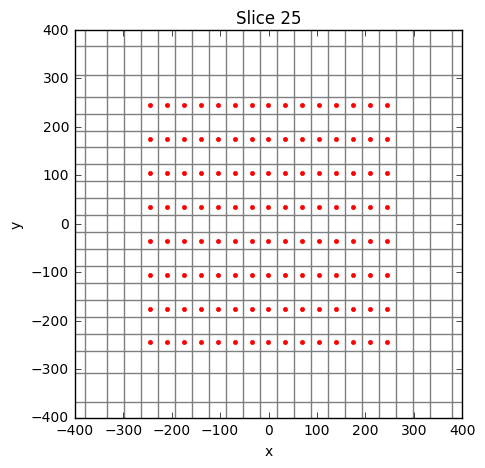

In [36]:
figsize(5,5)
mesh.plotSlice(np.ones(mesh.nC)*np.nan, grid=True)
plt.plot(xyz[:,0], xyz[:,1], 'r.')
xlim(-400, 400)
ylim(-400, 400)

In [41]:
import cPickle as pickle
TKCATEMexample = {"mesh":mesh, "sigma":sigma, "xyz":xyz}
pickle.dump(TKCATEMexample, open("TKCATEMexample.p", "wb"))